# IMPORT LIBRARY PYTHON

In [79]:
# Data preparation dan manipulation
import numpy as np
import pandas as pd
# Data Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# untuk implementasi pipeline
from sklearn.pipeline import Pipeline

# Scaling data
from sklearn.preprocessing import StandardScaler

# model Classification
from sklearn.neighbors import KNeighborsClassifier

# Splitting data dan Validation
from sklearn.model_selection import train_test_split

# membuat model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Principal Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA

# Shuffling the DataFrame
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# proses pemanggilan data
df = pd.read_csv("C:/Users/ASUS/Downloads/VIRTUAL INTERNSHIP ID-X PARTNERS/MINGGU 4/loan_data_2007_2014.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15352\314650078.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/ASUS/Downloads/VIRTUAL INTERNSHIP ID-X PARTNERS/MINGGU 4/loan_data_2007_2014.csv")


# DATA UNDERSTANDING

In [3]:
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(466285, 75)

In [5]:
df.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [6]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [7]:
df.dtypes

Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object

In [8]:
#sns.heatmap(df.isnull(), cbar = True, cmap = 'cool')

# DATA CLEANING AND PREPARATION

In [9]:
check_missing = df.isnull().sum() * 100/ df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

dti_joint                      100.000000
annual_inc_joint               100.000000
total_cu_tl                    100.000000
inq_fi                         100.000000
all_util                       100.000000
max_bal_bc                     100.000000
open_rv_24m                    100.000000
open_rv_12m                    100.000000
il_util                        100.000000
total_bal_il                   100.000000
mths_since_rcnt_il             100.000000
open_il_24m                    100.000000
open_il_12m                    100.000000
open_il_6m                     100.000000
open_acc_6m                    100.000000
verification_status_joint      100.000000
inq_last_12m                   100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981546
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
total_rev_hi_lim                15.071469
tot_coll_amt                    15

# DROP ATRIBUT YANG MEMPUNYAI MISSING VALUE LEBIH DARI 30%

In [10]:
high_miss = check_missing[check_missing > 30]
high_miss.sort_values(ascending=False)

open_il_24m                    100.000000
mths_since_rcnt_il             100.000000
total_cu_tl                    100.000000
inq_fi                         100.000000
all_util                       100.000000
max_bal_bc                     100.000000
open_rv_24m                    100.000000
open_rv_12m                    100.000000
il_util                        100.000000
total_bal_il                   100.000000
inq_last_12m                   100.000000
open_il_12m                    100.000000
open_il_6m                     100.000000
open_acc_6m                    100.000000
verification_status_joint      100.000000
dti_joint                      100.000000
annual_inc_joint               100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981546
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
dtype: float64

In [11]:
atribut_to_drop = [
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_cu_tl',
    'inq_fi',
    'all_util',
    'max_bal_bc',
    'open_rv_24m',
    'open_rv_12m',
    'il_util',
    'total_bal_il',
    'inq_last_12m',
    'open_il_12m',
    'open_il_6m',
    'open_acc_6m',
    'verification_status_joint',
    'dti_joint',
    'annual_inc_joint',
    'mths_since_last_record',
    'mths_since_last_major_derog',
    'desc',
    'mths_since_last_delinq',
    'next_pymnt_d'
]

In [12]:
df.drop(columns=atribut_to_drop, inplace=True)
df.shape

(466285, 53)

In [13]:
# drop atribut yang memiliki kategori yang banyak
df.select_dtypes(include='object').nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64

In [14]:
atribut_to_drop2 = [
    'grade',
    'sub_grade',
    'emp_length',
    'emp_title',
    'issue_d',
    'url',
    'purpose',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'last_credit_pull_d',
    'initial_list_status',
    'application_type',
    'last_pymnt_d',
    'Unnamed: 0',
    'id',
    'member_id'
]

In [15]:
df.drop(columns=atribut_to_drop2, inplace=True)
df.shape

(466285, 35)

# Drop Attributes that have high correlation on each other (above 0,8 correlation score)

In [16]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_highcor = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop_highcor

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15352\2967002656.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'total_rev_hi_lim']

In [17]:
atribut_to_drop3 = [
    'funded_amnt',
    'funded_amnt_inv',
    'installment',
    'out_prncp_inv',
    'total_pymnt_inv',
    'total_rec_prncp',
    'collection_recovery_fee',
    'total_rev_hi_lim',
]

In [18]:
df.drop(columns=atribut_to_drop3, inplace=True)
df.shape

(466285, 27)

In [19]:
df.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
home_ownership                    0
annual_inc                        4
verification_status               0
loan_status                       0
pymnt_plan                        0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
out_prncp                         0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
collections_12_mths_ex_med      145
policy_code                       0
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
dtype: int64

In [20]:
atribut_to_drop4 = [
    'delinq_2yrs',
    'inq_last_6mths',
    'pub_rec',
    'revol_util',
    'collections_12_mths_ex_med',
    'policy_code'
]

In [21]:
df.drop(columns=atribut_to_drop4, inplace=True)
df.shape

(466285, 21)

In [22]:
df.drop(columns='pymnt_plan', inplace=True)
df.shape

(466285, 20)

In [23]:
row_to_drop = df[df['tot_coll_amt'].isnull()].index
df.drop(row_to_drop, axis = 0, inplace = True)

In [24]:
# data setelah di cleaning
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
dti                    0
open_acc               0
revol_bal              0
total_acc              0
out_prncp              0
total_pymnt            0
total_rec_int          0
total_rec_late_fee     0
recoveries             0
last_pymnt_amnt        0
acc_now_delinq         0
tot_coll_amt           0
tot_cur_bal            0
dtype: int64

In [25]:
#sns.heatmap(df.isnull(), cbar = True, cmap = 'cool')

In [26]:
df.head(5)

,loan_amnt,term,int_rate,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal
42535,27050,36 months,10.99,OWN,55000.0,Verified,Current,22.87,14.0,36638,27.0,10018.90,21251.04,4219.94,0.0,0.0,885.46,0.0,0.0,114834.0
42536,9750,36 months,13.98,RENT,26000.0,Not Verified,Current,25.12,12.0,7967,28.0,3710.96,7994.83,1955.79,0.0,0.0,333.14,0.0,0.0,14123.0
42537,12000,36 months,6.62,MORTGAGE,105000.0,Not Verified,Current,14.05,12.0,13168,22.0,4266.62,8842.80,1109.42,0.0,0.0,368.45,0.0,0.0,267646.0
42538,12000,36 months,13.53,RENT,40000.0,Source Verified,Fully Paid,16.94,7.0,5572,32.0,0.00,13359.77,1359.78,0.0,0.0,119.17,0.0,15386.0,13605.0
42539,15000,36 months,8.90,MORTGAGE,63000.0,Not Verified,Current,16.51,8.0,11431,29.0,5449.27,11431.20,1880.47,0.0,0.0,476.30,0.0,1514.0,272492.0


# DATA LABELING

In [27]:
df['home_ownership'].unique()

array(['OWN', 'RENT', 'MORTGAGE', 'NONE', 'OTHER', 'ANY'], dtype=object)

In [28]:
df['verification_status'].unique()

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [29]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Late (16-30 days)',
       'Charged Off', 'In Grace Period', 'Default'], dtype=object)

# REPLACING VALUES

In [31]:
df['home_ownership'] = df['home_ownership'].str.replace('OWN', '0')
df['home_ownership'] = df['home_ownership'].str.replace('RENT', '1')
df['home_ownership'] = df['home_ownership'].str.replace('MORTGAGE', '2')
df['home_ownership'] = df['home_ownership'].str.replace('NONE', '3')
df['home_ownership'] = df['home_ownership'].str.replace('OTHER', '4')
df['home_ownership'] = df['home_ownership'].str.replace('ANY', '5')
df['home_ownership'].unique()

array(['0', '1', '2', '3', '4', '5'], dtype=object)

In [32]:
df['verification_status'] = df['verification_status'].str.replace('Source Verified', 'Source_Verified')
df['verification_status'] = df['verification_status'].str.replace('Not Verified', 'Not_Verified')
df['verification_status'] = df['verification_status'].str.replace('Verified', 'Verified')
df['verification_status'].unique()

array(['Verified', 'Not_Verified', 'Source_Verified'], dtype=object)

In [34]:
df['verification_status'] = df['verification_status'].str.replace('Source_Verified', '0')
df['verification_status'] = df['verification_status'].str.replace('Not_Verified', '1')
df['verification_status'] = df['verification_status'].str.replace('Verified', '0')
df['verification_status'].unique()

array(['0', '1'], dtype=object)

In [36]:
df['loan_status'] = df['loan_status'].str.replace('Current', '0')
df['loan_status'] = df['loan_status'].str.replace('Fully Paid', '1')
df['loan_status'] = df['loan_status'].str.replace('Charged Off', '2')
df['loan_status'] = df['loan_status'].str.replace('In Grace Period', '3')
df['loan_status'] = df['loan_status'].str.replace('Default', '4')
df['loan_status'] = df['loan_status'].str.replace('Late (31-120 days)', '5')
df['loan_status'] = df['loan_status'].str.replace('Late (16-30 days)', '6')
df['loan_status'].unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15352\512046724.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['loan_status'] = df['loan_status'].str.replace('Late (31-120 days)', '5')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15352\512046724.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['loan_status'] = df['loan_status'].str.replace('Late (16-30 days)', '6')


array(['0', '1', 'Late (31-120 days)', 'Late (16-30 days)', '2', '3', '4'],
      dtype=object)

In [37]:
df['loan_status'] = df['loan_status'].replace('Late (31-120 days)', 5)
df['loan_status'] = df['loan_status'].replace('Late (16-30 days)', 6)
df['loan_status'].unique()

array(['0', '1', 5, 6, '2', '3', '4'], dtype=object)

In [41]:
df.dtypes

loan_amnt                int64
term                    object
int_rate               float64
home_ownership         float64
annual_inc             float64
verification_status    float64
loan_status            float64
dti                    float64
open_acc               float64
revol_bal                int64
total_acc              float64
out_prncp              float64
total_pymnt            float64
total_rec_int          float64
total_rec_late_fee     float64
recoveries             float64
last_pymnt_amnt        float64
acc_now_delinq         float64
tot_coll_amt           float64
tot_cur_bal            float64
dtype: object

In [42]:
df['term'] = df['term'].str.replace(' months', '').astype(int)

In [43]:
df['term'] = df['term'].astype(float)
df['home_ownership'] = df['home_ownership'].astype(float)
df['verification_status'] = df['verification_status'].astype(float)
df['loan_status'] = df['loan_status'].astype(float)


In [44]:
df.head(5)

,loan_amnt,term,int_rate,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,acc_now_delinq,tot_coll_amt,tot_cur_bal
42535,27050,36.0,10.99,0.0,55000.0,0.0,0.0,22.87,14.0,36638,27.0,10018.90,21251.04,4219.94,0.0,0.0,885.46,0.0,0.0,114834.0
42536,9750,36.0,13.98,1.0,26000.0,1.0,0.0,25.12,12.0,7967,28.0,3710.96,7994.83,1955.79,0.0,0.0,333.14,0.0,0.0,14123.0
42537,12000,36.0,6.62,2.0,105000.0,1.0,0.0,14.05,12.0,13168,22.0,4266.62,8842.80,1109.42,0.0,0.0,368.45,0.0,0.0,267646.0
42538,12000,36.0,13.53,1.0,40000.0,0.0,1.0,16.94,7.0,5572,32.0,0.00,13359.77,1359.78,0.0,0.0,119.17,0.0,15386.0,13605.0
42539,15000,36.0,8.90,2.0,63000.0,1.0,0.0,16.51,8.0,11431,29.0,5449.27,11431.20,1880.47,0.0,0.0,476.30,0.0,1514.0,272492.0


In [45]:
df.dtypes

loan_amnt                int64
term                   float64
int_rate               float64
home_ownership         float64
annual_inc             float64
verification_status    float64
loan_status            float64
dti                    float64
open_acc               float64
revol_bal                int64
total_acc              float64
out_prncp              float64
total_pymnt            float64
total_rec_int          float64
total_rec_late_fee     float64
recoveries             float64
last_pymnt_amnt        float64
acc_now_delinq         float64
tot_coll_amt           float64
tot_cur_bal            float64
dtype: object

# Checking if the Target Class is Balanced or not

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    276663
1.0    119346
Name: verification_status, dtype: int64


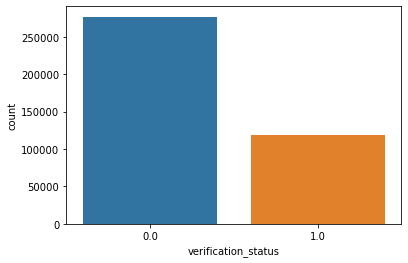

In [49]:
sns.countplot(df['verification_status'])
print(df.verification_status.value_counts())

# Oversampling Minority Class

In [50]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['verification_status']==0)] 
df_minority = df[(df['verification_status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 276663, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    276663
0.0    276663
Name: verification_status, dtype: int64


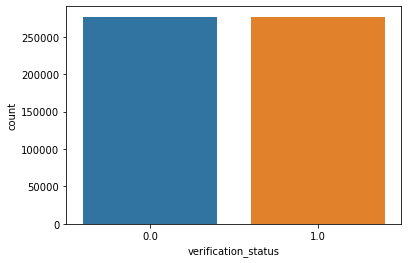

In [53]:
sns.countplot(df_upsampled['verification_status'])
print(df_upsampled.verification_status.value_counts())

# DATA CORELATION

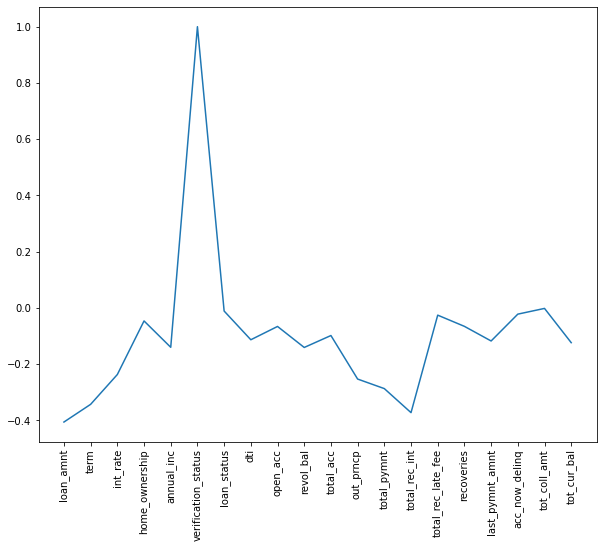

In [54]:
corr = df_upsampled[df_upsampled.columns].corr()['verification_status']
plt.figure(figsize=(10,8))
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

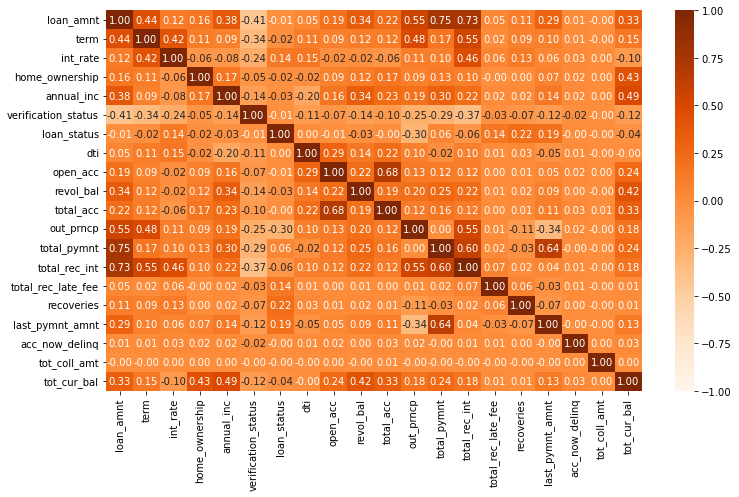

In [58]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_upsampled.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Oranges")
plt.show()

# Building Model Machine Learning

In [59]:
X = df_upsampled.drop('verification_status', axis=1)
y = df_upsampled['verification_status']

In [61]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [63]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state=0)
dtree = dtree.fit(X_train, y_train)

In [80]:
lb = LabelEncoder()
lb.fit(y_train)

LabelEncoder()

In [81]:
y_train

400625    0.0
249858    0.0
277242    0.0
451175    0.0
98325     0.0
         ... 
158235    0.0
455535    1.0
138007    1.0
298559    0.0
80661     0.0
Name: verification_status, Length: 442660, dtype: float64

In [83]:
y_test

353403    0.0
292456    1.0
461184    0.0
297609    1.0
419227    0.0
         ... 
79187     1.0
277422    0.0
249500    1.0
124409    0.0
316174    0.0
Name: verification_status, Length: 110666, dtype: float64

In [87]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 50.05 %


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


TypeError: 'DecisionTreeClassifier' object is not iterable

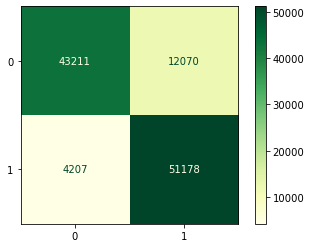

In [77]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=dtree).plot(cmap = "YlGn")

In [66]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
0,loan_amnt,0.204134
18,tot_cur_bal,0.098360
6,dti,0.089566
8,revol_bal,0.074554
11,total_pymnt,0.068828
4,annual_inc,0.067109
12,total_rec_int,0.060518
1,term,0.060008
15,last_pymnt_amnt,0.051159
9,total_acc,0.050687


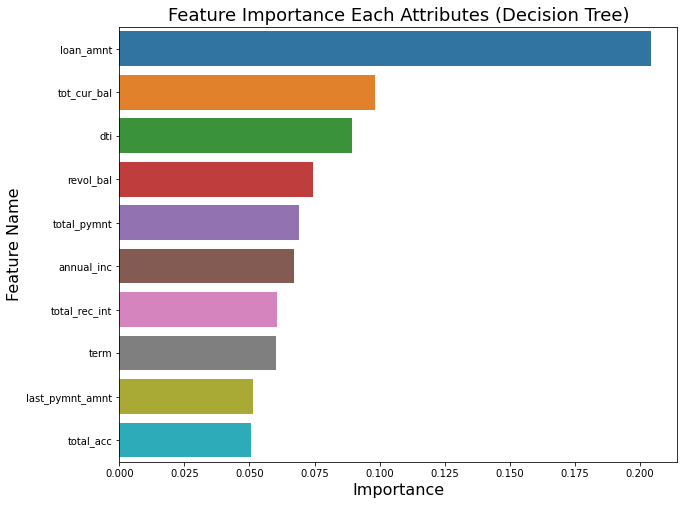

In [67]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()